In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Основы машинного обучения

**разнообразие задач:**
* классификация
* регрессия
* кластеризация
* понижение размерности
* обучение с подкреплением

**этапы работы с данными:**
1. предоработка данных
2. обучение
3. предсказание
4. проверка качества предсказания

**обучение с учителем:**

есть признаки и таргеты

*цель:* научиться по признакам предсказывать таргеты

**обучение без учителя:**

*цель:* найти в данных какую-то внутреннюю структуру

#Проверка качества предсказания


so called метрики качества

-- это функции, оценивающие успешность предсказания верного результата вашей моделью.

Они меняются от задачи к задаче, то как минимум одну из них вы знаете с лаб по физике. *Как она называется?*

#Обучение без учителя



##Кластеризация

**постановка задачи:**

разделить данные на k кластеров.

**Как можно делить на кластеры:**
1. Каждому объекту соотвествует класс
2. Каждой области пространства дать свой кластер
3. Каждому объекту соотвествует массив вероятностей принадлежности к тому или иному классу



**Типы кластеров:**
1. Шарообразные
2. Ленточные
3. Соединяются перемычками
4. Разреженный фон из шумовых объектов
5. Перекрывающиеся
6. Объединение в кластеры не по расстоянию
7. Отсуствие кластеров

**Неоднозначность кластеризации:**

сколько можно найти кластеров? 2, 4, 6?.. А сколько надо?
количество кластеров -- *гиперпараметр*

**Примеры:**

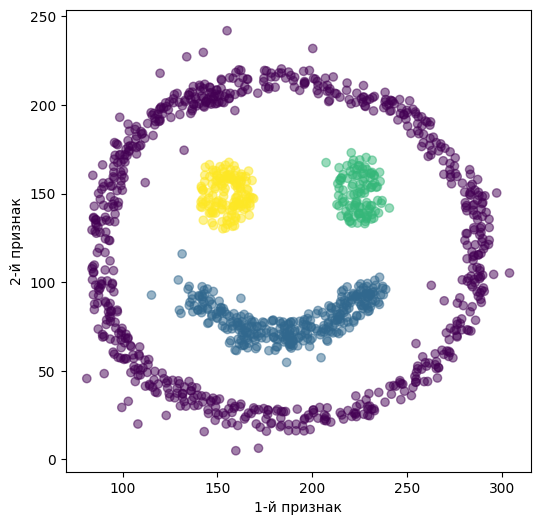

In [ ]:
df = pd.read_csv("face.csv")
fig = plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], c=df['color'], alpha=0.5)
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

In [ ]:
arr = []
for i in range(len(df["x"].to_numpy())):
  arr.append(True if df["x"][i]>200 else False)
arr

In [ ]:
df.insert(1, "new_color", arr)
df

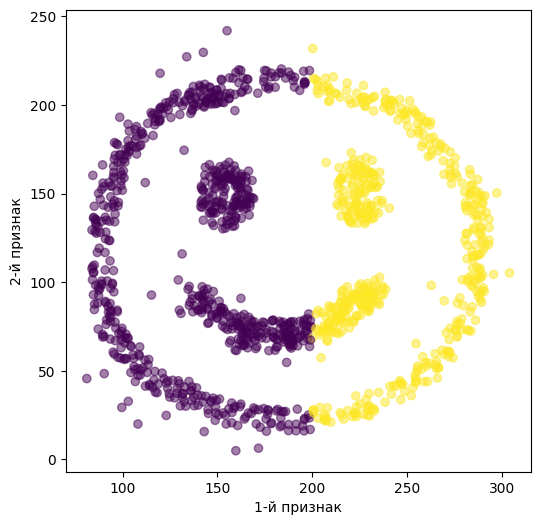

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], c=df['new_color'], alpha=0.5)
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

##Разные методы кластеризации: k-means

**Известно:**
1. Выборка (датасет)
2. Число кластеров k

**Цель:**

наиболее оптимально разбить эту выборку на k кластеров.

**Метрика качества:**

Евклидова метрика

$$ρ(x, z) = ||x-z||^2$$

**Этапы работы:**
1. Задаём начальные приближения центров кластеров (координатами, это могут быть любые координаты, не обязательно соответствующие конкретным объектам)
2. Повторяем:

  2.1 Относим каждый объект в ближайшему центру $$f(x_i) = argmin_k||x_i-\mu_k||^2$$
  2.2. Вычисляем новые положения центров
  $$\mu_k = \dfrac{\sum_{i=1}^nI\{f(x_i) = k\}x_i}{\sum_{i=1}^nI\{f(x_i) = k\}}$$
  2.3 Повторяем, пока $f(x_i)$ не перестанут меняться

  Теорема:

  K-means оптимизирует сумму квадратов внутрикластерных расстояний до центров кластера.

  $$Q(f) = \sum_{i=1}^n||x_i-\mu_{f(x_i)}||^2 -> min_{f,\mu}$$


**Особенности:**
1. Сходится к локальному оптимуму,
имеет смысл запускать из разных начальных приближений.
2. Кластеры представляют собой выпуклые множества.
3. K-means — метрический метод, имеет смысл делать снижение размерности: отбор признаков, PCA, UMAP, t-SNE и прочее.

**Пример работы:**

тут [хороший пример](https://www.kaggle.com/code/prashant111/k-means-clustering-with-python) работы k-means

а вот ещё пример [попроще](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
print(kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


In [ ]:
X[:,0]

array([ 1,  1,  1, 10, 10, 10])

[1 1 1 0 0 0]


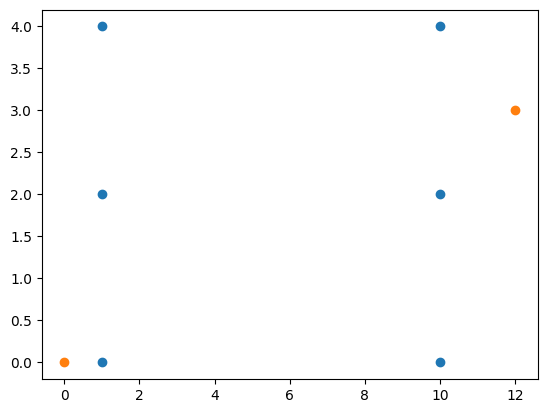

In [ ]:
test = np.array([[0, 0], [12, 3]])
plt.scatter(X[:,0], X[:,1])
plt.scatter(test[:,0], test[:,1])
print(kmeans.labels_)

пример побольше:

Automatically created module for IPython interactive environment


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


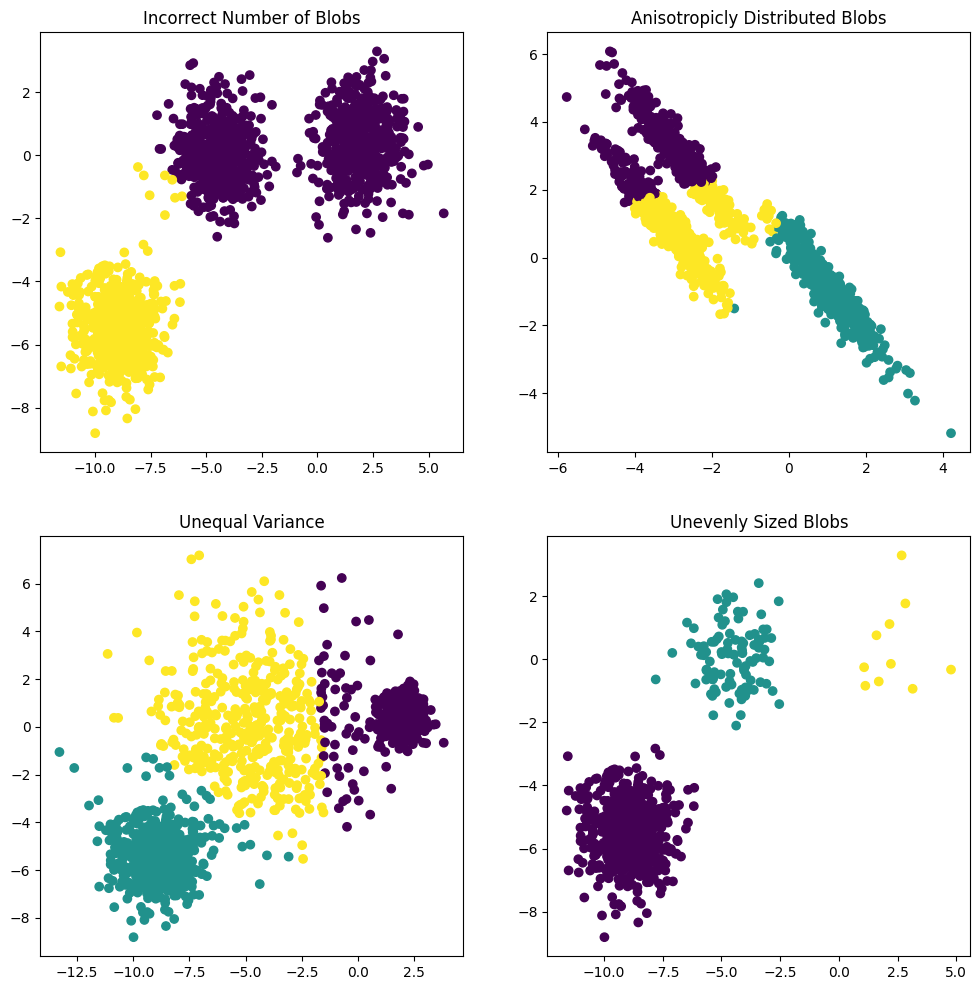

In [ ]:
print(__doc__)

# Author: Phil Roth <[email protected]>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

##Разные методы кластеризации: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Подход всех density-based методов:**

Кластеры — непрерывные области большой плотности,
разделенные от др. кластеров областями с низкой плотностью.

**Известно:**
1. Выборка
2. Два гиперпараметра: $𝛆, m$

**Цель:**
разбить эту выборку на кластеры.

Для каждой точки рассматривается ее 𝜀-окрестность:

$$U_{ε}(x) = \{x \in X | \rho(x,z) \leq ε \}$$

Выделяются 3 типа объектов:
1. Основной: $|U_{ε}(x)| \geq m$
2. Пограничный: Не является основным, но находится в $ε$-окресности основного объекта
3. Шумовой: не является основным или пограничным.




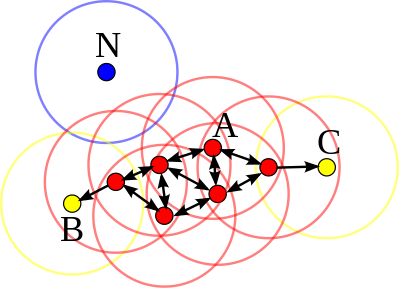

**Процесс:**
1. Берем еще не помеченный объект x
2. Если $|U𝜀(x)| < m$, то помечаем x как возможно шумовой.
Позже x может стать частью какого-то кластера.
3. Если $|U𝜀(x)| > m$, то создаем кластер $K = U𝜖(x)$.
Находим все точки, достижимые из x по основным точкам, в т.ч. те, что были помечены шумовыми.
Помечаем найденные точки как точки кластера K.
*Примечание. Точка y достижима из основной точки x,
если существует путь по основным точкам из x в y.*
4.  Повторяем 1-3 пока есть неразмеченные объекты

**Пример работы:**

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


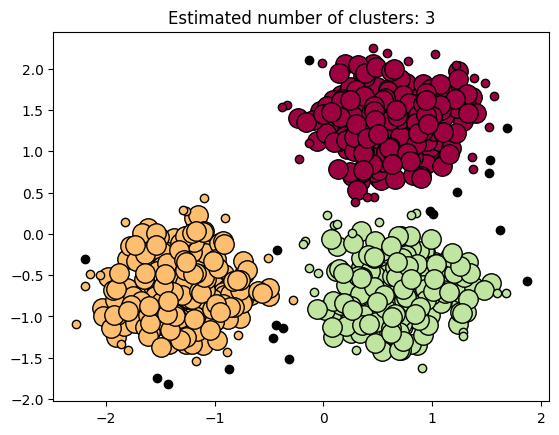

In [ ]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

классный пример [на языке R](https://www.kaggle.com/code/lenron1671/practical-5)

**Плюсы:**
1. Кластеры могут быть произвольной формы.
2. Деление объектов на основные, пограничные и шумовые.
=⇒ Можем выкинуть шум.
3. Быстрая кластеризация.
В худшем случае работает $O(n^2)$.

**Минусы:**
1. Чуть-чуть сливающиеся кластеры определяются как один.
2. Плохо работает, разные кластеры имеют разную плотность.
3. Нужно подбирать гиперпараметры.



##DBSCAN: Подбор гиперпараметров

Какое 𝜀 и m выбрать?
Нарисуем график:

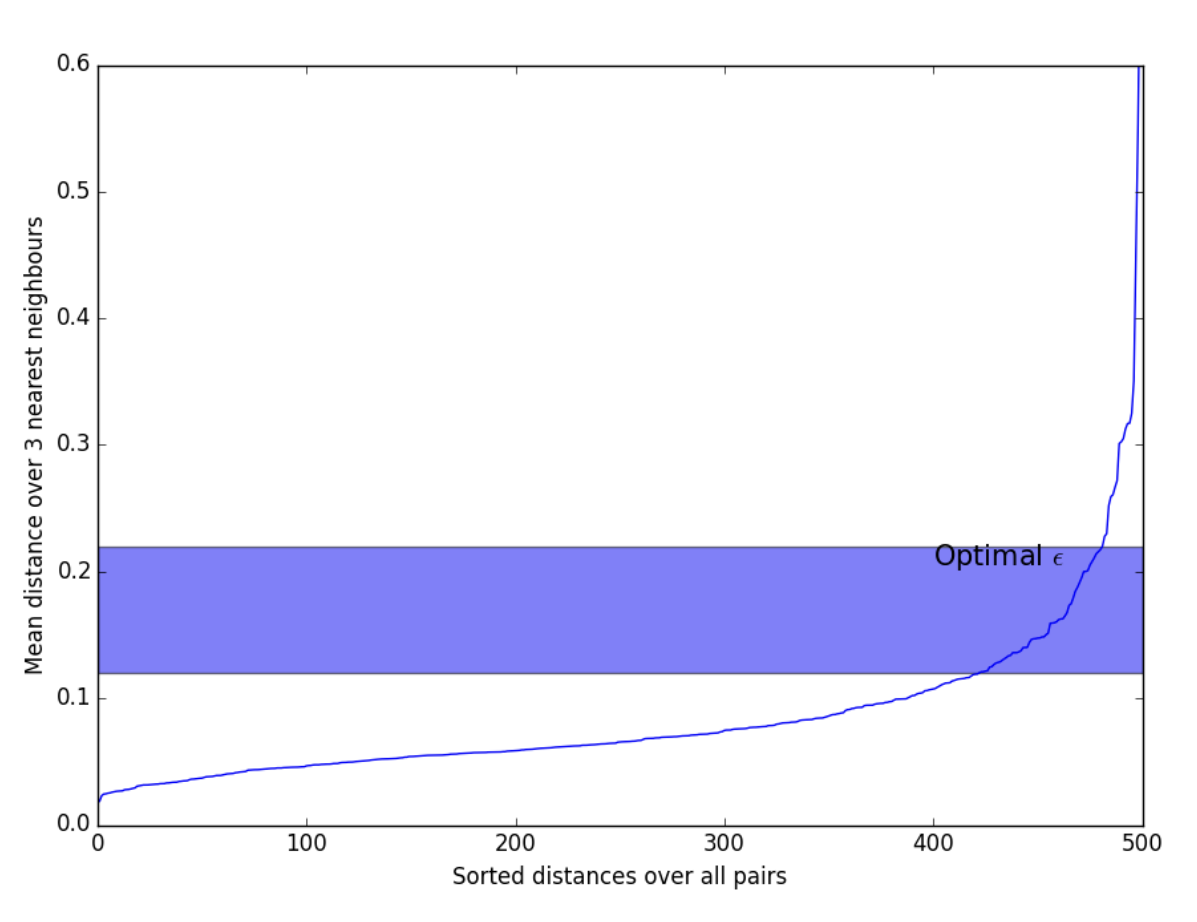

**Задание:**
1. с помощью л-средних кластеризуйте датасет ирисов
2. тот же датасет кластеризуйте с помощью дбскана
3. опишите в чем отличие результатов

**Хорошие ссылки:**
1. набор статей [про кластеризацию](https://habr.com/ru/articles/322034/)
2.